(6, 6) (6, 1) (1, 6) (1, 1)


C:\qaz\projects\delta-control\examples\../sdfpy\sdfpy.py:240: LinAlgWarning: Ill-conditioned matrix (rcond=5.55112e-17): result may not be accurate.
  B = linalg.solve(T, B)
C:\qaz\projects\delta-control\examples\../sdfpy\sdfpy.py:29: LinAlgWarning: Ill-conditioned matrix (rcond=4.09742e-19): result may not be accurate.
  S_inv = linalg.solve(S, np.eye(S.shape[0]))
C:\qaz\projects\delta-control\examples\../sdfpy\sdfpy.py:40: LinAlgWarning: Ill-conditioned matrix (rcond=9.79541e-17): result may not be accurate.
  AT = linalg.solve(T0, A @ T0)
C:\qaz\projects\delta-control\examples\../sdfpy\sdfpy.py:43: LinAlgWarning: Ill-conditioned matrix (rcond=9.79541e-17): result may not be accurate.
  BT = linalg.solve(T0, B)
C:\qaz\projects\delta-control\examples\../sdfpy\sdfpy.py:73: LinAlgWarning: Ill-conditioned matrix (rcond=9.79541e-17): result may not be accurate.
  T0_inv = linalg.solve(T0, np.eye(T0.shape[0]))
C:\qaz\projects\delta-control\examples\../sdfpy\sdfpy.py:62: LinAlgWarning: Ill-

q = 
 [[-17.28559943   7.41171864 -10.31349575 -12.07690033 -14.85059417
  -14.5692459    7.01874339]]
Coefficient bitwidths = 
 [[20. 15. 26. 28. 28. 28. 15.]]
accum[ 0 ] | 43.0 18.0
alpha[ 0 ] | 20.0 18.0
beta [ 0 ] | 20.0 18.0
k_ts [ 0 ] | 25.0 24.0
----------------------------------------
accum[ 1 ] | 25.0 0.0
alpha[ 1 ] | 15.0 0.0
beta [ 1 ] | 15.0 0.0
k_ts [ 1 ] | 12.0 11.0
----------------------------------------
accum[ 2 ] | 36.0 11.0
alpha[ 2 ] | 26.0 11.0
beta [ 2 ] | 26.0 11.0
k_ts [ 2 ] | 13.0 12.0
----------------------------------------
accum[ 3 ] | 38.0 13.0
alpha[ 3 ] | 28.0 13.0
beta [ 3 ] | 28.0 13.0
k_ts [ 3 ] | 13.0 12.0
----------------------------------------
accum[ 4 ] | 40.0 15.0
alpha[ 4 ] | 28.0 15.0
beta [ 4 ] | 28.0 15.0
k_ts [ 4 ] | 16.0 15.0
----------------------------------------
accum[ 5 ] | 40.0 15.0
alpha[ 5 ] | 28.0 15.0
beta [ 5 ] | 28.0 15.0
k_ts [ 5 ] | 17.0 16.0
----------------------------------------
accum[ 6 ] | 25.0 0.0
alpha[ 6 ] | 15.0 0.0


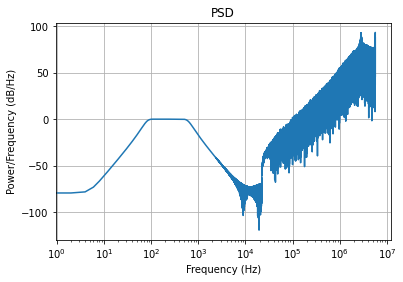

In [1]:
#
# Filter example - cheby1 bandpass
#
import numpy as np
from scipy import signal
import sys

if '../sdfpy' not in sys.path:
  sys.path.insert(0,'../sdfpy')

import sd_sim
import sdfpy as sdf

# ----------------------------------------------------------
# Filter Specifications
OSR = 256      # oversample ratio
fb  = 22050    # nyquist
fs  = OSR*2*fb # sampling frequency
ts  = 1/fs     # sampling period

# ----------------------------------------------------------
Rp    = 0.1;
Wn    = 2*np.pi*np.array([100, 500])
ftype = 'bandpass';
N     = 6;

[z,p,k]   = signal.cheby1(N/2,Rp,Wn,ftype, analog=True, output='zpk')
[A,B,C,D] = signal.zpk2ss(z,p,k)

print(A.shape, B.shape, C.shape, D.shape)

filter = sdf.sd_filter(OSR,fb)
filter.run(A,B,C,D)
sd_sim.sim_filter(filter)